In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import altair as alt
from sklearn.cluster import KMeans
%matplotlib inline 
sns.set(color_codes=True)

In [3]:
df = pd.read_excel(r"fight_eda.xlsx")

In [42]:
df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,R_SIG_STR_ATT,B_SIG_STR.,B_SIG_STR_ATT,R_SIG_STR_pct,B_SIG_STR_pct,...,B_GROUND_ATT,win_by,last_round,Format,date,location,Winner,Championship Bout,Weight Class,win_method
0,Henry Cejudo,Marlon Moraes,0,0,90,171,57,119,0.52,0.47,...,1,KO/TKO,3,5 Rnd (5-5-5-5-5),6/8/2019,"Chicago, Illinois, USA",Henry Cejudo,YES,Bantamweight,Finishes
1,Valentina Shevchenko,Jessica Eye,1,0,8,11,2,12,0.72,0.16,...,0,KO/TKO,2,5 Rnd (5-5-5-5-5),6/8/2019,"Chicago, Illinois, USA",Valentina Shevchenko,YES,Women's Flyweight,Finishes
2,Tony Ferguson,Donald Cerrone,0,0,104,200,68,185,0.52,0.36,...,0,TKO - Doctor's Stoppage,2,3 Rnd (5-5-5),6/8/2019,"Chicago, Illinois, USA",Tony Ferguson,NO,Lightweight,Finishes
3,Jimmie Rivera,Petr Yan,0,2,73,192,56,189,0.38,0.29,...,10,Decision - Unanimous,3,3 Rnd (5-5-5),6/8/2019,"Chicago, Illinois, USA",Petr Yan,NO,Bantamweight,Decisions
4,Tai Tuivasa,Blagoy Ivanov,0,1,64,144,73,123,0.44,0.59,...,6,Decision - Unanimous,3,3 Rnd (5-5-5),6/8/2019,"Chicago, Illinois, USA",Blagoy Ivanov,NO,Heavyweight,Decisions


<h4> Exploring Catagorical Data </h4>

Text(0.5, 1.0, 'Win Methods by Weight Class')

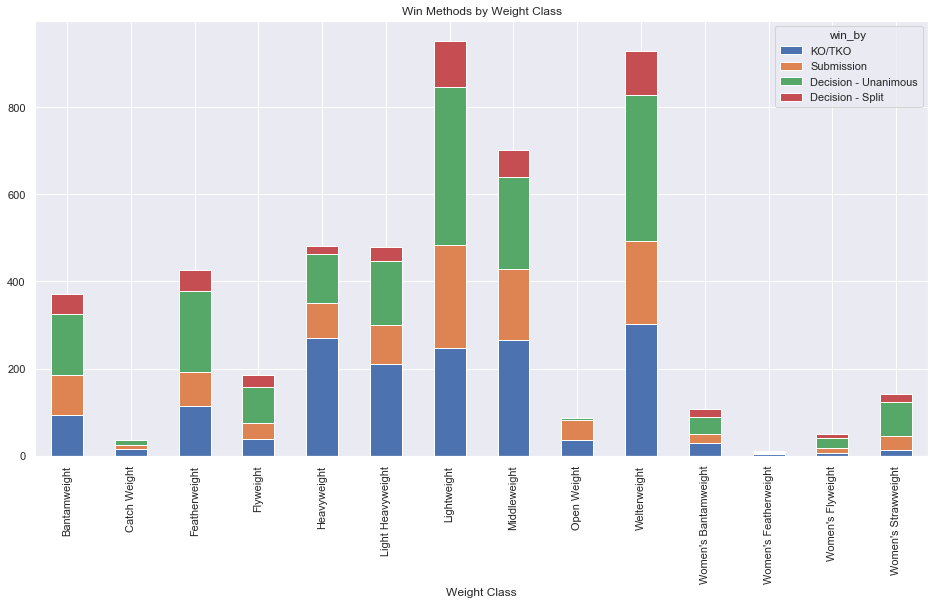

In [403]:
df1 = df[['win_by','Weight Class']]
df2 = df1.groupby(['Weight Class', 'win_by'])['Weight Class'].count().unstack('win_by').fillna(0)
plt.rcParams["figure.figsize"] = (16, 8)
df2[['KO/TKO','Submission','Decision - Unanimous','Decision - Split']].plot(kind='bar', stacked=True)
plt.title('Win Methods by Weight Class')

Text(0.5, 1.0, 'Championship bouts by Weight Class')

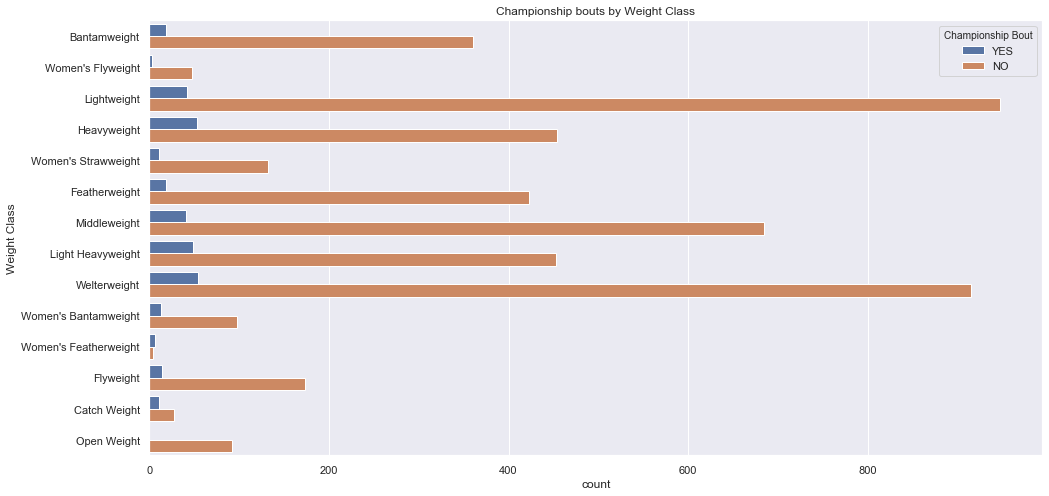

In [404]:
plt.figure(figsize=(16,8)) 
ax = sns.countplot(y='Weight Class',hue='Championship Bout',data=df)
ax.set_title('Championship bouts by Weight Class')

In [9]:
def win_method(x):
    if x == 'KO/TKO' or x == "TKO - Doctor's Stoppage" or x == 'Submission':
        return 'Finishes'
    else:
        return 'Decisions'

df['win_method'] = df['win_by'].apply(lambda x: win_method(x))

In [11]:
df_finishes = df.loc[df['win_by'].isin(['KO/TKO',"TKO - Doctor's Stoppage",'Submission'])]

Text(0.5, 1.0, 'Win Method for Normal and Championship Bouts')

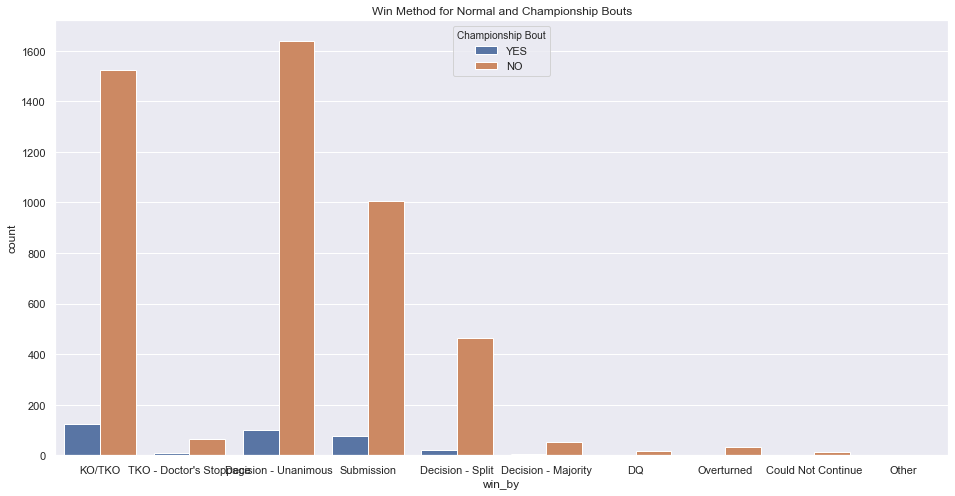

In [402]:
plt.figure(figsize=(16,8)) 
ax = sns.countplot(x='win_by',hue='Championship Bout',data=df)
ax.set_title('Win Method for Normal and Championship Bouts')

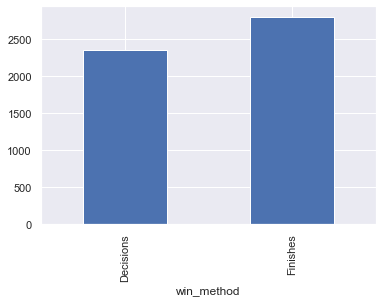

In [40]:
df.groupby('win_method').size().plot(kind='bar')

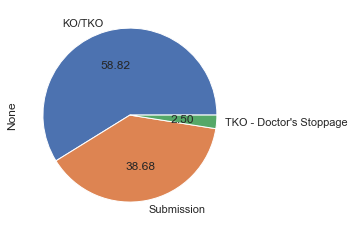

In [41]:
df_finishes.groupby('win_by').size().plot(kind='pie', autopct='%.2f')

In [44]:
df['last_round']=pd.to_numeric(df.last_round)

In [45]:
df1 =  df.loc[df['win_by'].isin(['KO/TKO','Submission'])]

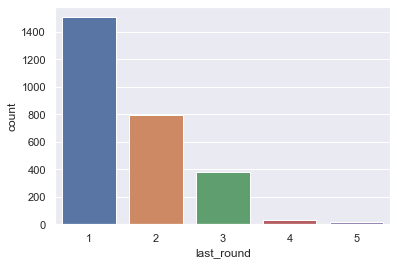

In [53]:
sns.countplot(x='last_round',data=df1)

<h4> Exploring Statistical Data </h4>

First we will prepare our data set with 

In [405]:
df['R_corner'] = np.where(df['R_fighter']==df['Winner'],1,0)
df['B_corner'] = np.where(df['B_fighter']==df['Winner'],1,0)

In [406]:
r_columns = ['R_fighter', 'B_fighter','R_KD','R_SIG_STR.','R_SIG_STR_ATT','R_SIG_STR_pct','R_TOTAL_STR.', 
               'R_TOTAL_STR_ATT','R_TD', 'R_TD_ATT','R_TD_pct','R_SUB_ATT','R_PASS',
               'R_REV','R_HEAD', 'R_HEAD_ATT','R_BODY', 'R_BODY_ATT','R_LEG', 'R_LEG_ATT',
               'R_CLINCH', 'R_CLINCH_ATT','R_GROUND','R_GROUND_ATT','R_corner',
               'win_by', 'last_round','Championship Bout']
b_columns = ['R_fighter', 'B_fighter','B_KD','B_SIG_STR.','B_SIG_STR_ATT','B_SIG_STR_pct','B_TOTAL_STR.', 
              'B_TOTAL_STR_ATT','B_TD', 'B_TD_ATT','B_TD_pct','B_SUB_ATT','B_PASS',
              'B_REV','B_HEAD', 'B_HEAD_ATT','B_BODY', 'B_BODY_ATT','B_LEG', 'B_LEG_ATT',
              'B_CLINCH','B_CLINCH_ATT','B_GROUND','B_GROUND_ATT','B_corner',
              'win_by', 'last_round','Championship Bout']
s_columns = ['R_fighter','B_fighter','KD','SIG_STR.','SIG_STR_ATT','SIG_STR_pct','TOTAL_STR.',
                                   'TOTAL_STR_ATT','TD','TD_ATT','TD_pct','SUB_ATT','PASS','REV','HEAD','HEAD_ATT',
                                   'BODY', 'BODY_ATT','LEG', 'LEG_ATT','CLINCH','CLINCH_ATT','GROUND','GROUND_ATT',
                                   'win_corner','win_by','last_round','Championship Bout']

In [407]:
r_stats = df[r_columns]
b_stats = df[b_columns]
df_stats = pd.DataFrame(columns = s_columns)

In [408]:
bdf = dict(zip(r_stats, df_stats)) 
r_stats.rename(columns=bdf,inplace=True)
rdf = dict(zip(b_stats, df_stats))
b_stats.rename(columns=rdf,inplace=True)

C:\Users\phadk\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [409]:
winner_stats = b_stats.append(r_stats, ignore_index=True)

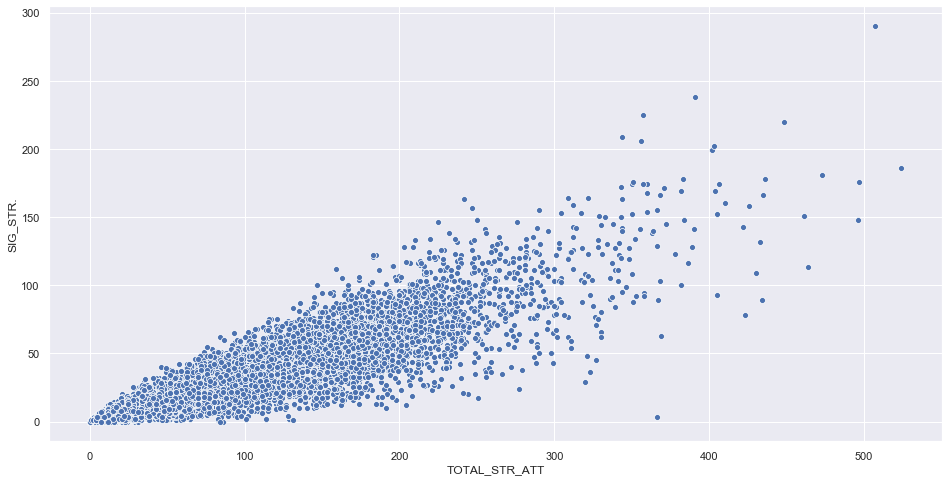

In [417]:
#striking
sns.scatterplot(y='SIG_STR.',x='TOTAL_STR_ATT',data=winner_stats)

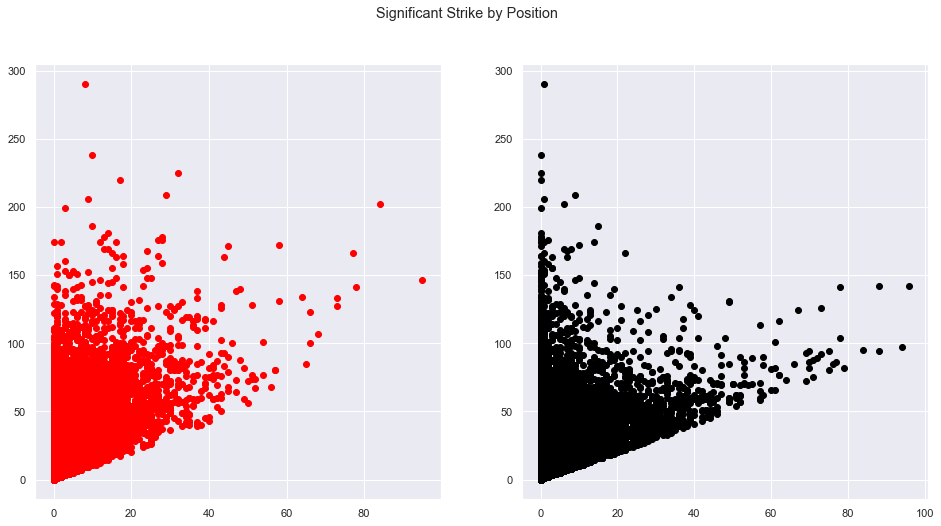

In [384]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Significant Strike by Position')
ax1.scatter('CLINCH','SIG_STR.',data=winner_stats,color='red')
ax2.scatter('GROUND','SIG_STR.',data=winner_stats,color='black')

Text(0, 0.5, 'Total Strikes')

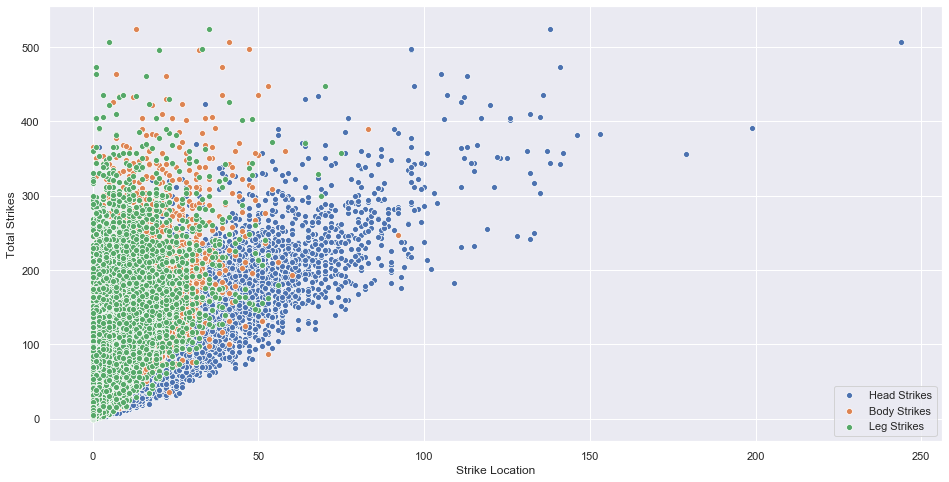

In [385]:
plt.figure(figsize=(16,8)) 
ax1 = sns.scatterplot(y='TOTAL_STR_ATT',x='HEAD',data=winner_stats, label='Head Strikes')
ax2 = sns.scatterplot(y='TOTAL_STR_ATT',x='BODY',data=winner_stats,label='Body Strikes')
ax3 = sns.scatterplot(y='TOTAL_STR_ATT',x='LEG',data=winner_stats,label='Leg Strikes')
plt.xlabel("Strike Location")
plt.ylabel("Total Strikes")

(array([5484., 2246., 1057.,  631.,  353.,  246.,  139.,   71.,   34.,
          27.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

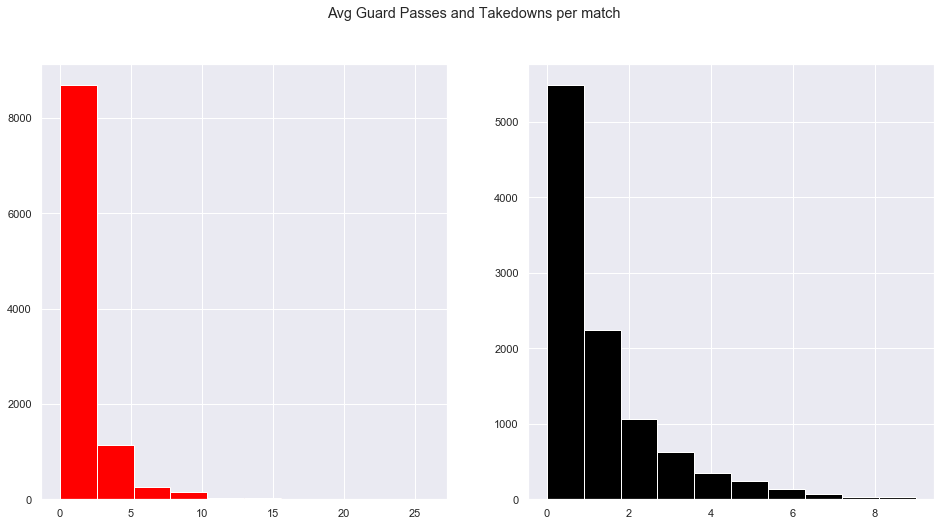

In [386]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Avg Guard Passes and Takedowns per match')
ax1.hist('PASS',data=winner_stats,color='red')
ax2.hist('TD',data=winner_stats,color='black')

In [387]:
winner_stats.columns

Index(['R_fighter', 'B_fighter', 'KD', 'SIG_STR.', 'SIG_STR_ATT',
       'SIG_STR_pct', 'TOTAL_STR.', 'TOTAL_STR_ATT', 'TD', 'TD_ATT', 'TD_pct',
       'SUB_ATT', 'PASS', 'REV', 'HEAD', 'HEAD_ATT', 'BODY', 'BODY_ATT', 'LEG',
       'LEG_ATT', 'CLINCH', 'CLINCH_ATT', 'GROUND', 'GROUND_ATT', 'win_corner',
       'win_by', 'last_round', 'Championship Bout'],
      dtype='object')

In [397]:
accuracy = winner_stats[['SIG_STR.','TOTAL_STR.','SIG_STR_pct','TD_pct','SUB_ATT','PASS', 'REV',
                         'KD','HEAD','BODY','LEG','CLINCH','GROUND','win_corner']]

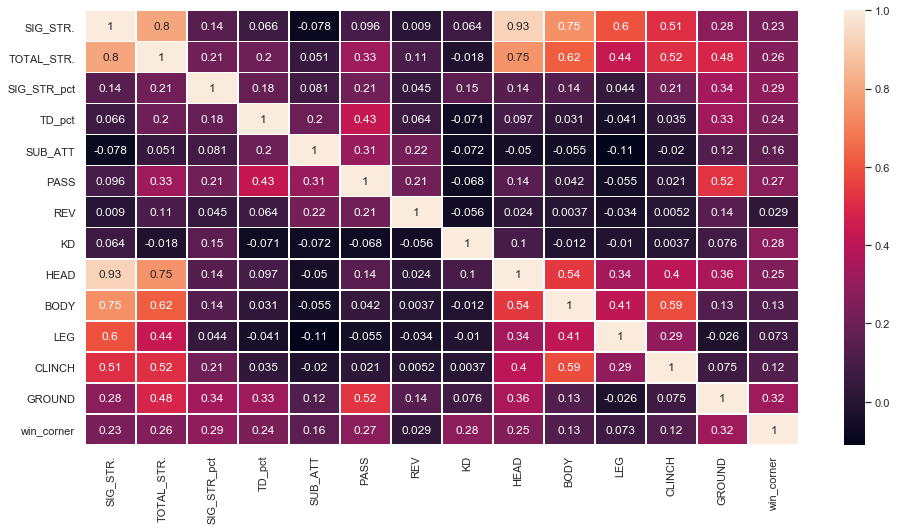

In [398]:
sns.heatmap(accuracy.corr(), xticklabels=accuracy.corr().columns, yticklabels=accuracy.corr().columns, annot=True, linewidth=0.5)

<h4> Conclusion </h4>

From the following Exploratory Data Analysis we gathered a few important insights about he UFC


> 1. The Lightweight, Welterweight and Middleweight Division are the most active with most number of Fights. <br>

> 2. Lightweight Division has the most number of Championship Bouts. Most number of the fights were won by Decision or Submissions.<br>

> 3. Welterweight Division has the most number of Number of normal bouts. It also leads in the most number of KO's.<br>

> 4. Most of the UFC fight have been Finishes rather than Judges decisions. <br>

> 5. Out of the finishes almost 60% are Knockouts and 40% are submissions. A fighter is most likely to get finished(Knockout or submisison) in the first two rounds<br>

> 6. The more strikes a fighter attemps the higher number of significant strikes he will land. There is no specificity in the location of the strikes or in which position the strike was landed. 

> 7. Submission are more complex to execute and hence statistically they are quite difficuly to map out. 

> 8. Judges decision are more likely to happen if the fight goes more 3 rounds. Also these decision are highly arbitary with no pattern in relation with the statistics like significant strikes, takedowns, submission accuracy and Guard Passes.

> 9. The statistics measured during the bout lack significant correlation with the result of the match. Hence very hard to predict. 